In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('./data/train.csv', index_col=0)

In [13]:
df.shape

(103904, 24)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [ ]:
for col in df.columns:
    if df[col].dtype==object:
        print('\n',df[col].value_counts(normalize=True))


 Gender
Female    0.507459
Male      0.492541
Name: proportion, dtype: float64

 Customer Type
Loyal Customer       0.817322
disloyal Customer    0.182678
Name: proportion, dtype: float64

 Type of Travel
Business travel    0.689627
Personal Travel    0.310373
Name: proportion, dtype: float64

 Class
Business    0.477989
Eco         0.449886
Eco Plus    0.072124
Name: proportion, dtype: float64

 satisfaction
neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: proportion, dtype: float64


In [46]:
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# data load
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model train
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, cat_features=categorical_columns)
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=10)

# prediction
y_pred = model.predict(X_test)

# accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

0:	learn: 0.5646088	test: 0.5646712	best: 0.5646712 (0)	total: 69.7ms	remaining: 6.89s
10:	learn: 0.1978380	test: 0.1955544	best: 0.1955544 (10)	total: 184ms	remaining: 1.49s
20:	learn: 0.1566058	test: 0.1544147	best: 0.1544147 (20)	total: 310ms	remaining: 1.17s
30:	learn: 0.1342431	test: 0.1325688	best: 0.1325688 (30)	total: 429ms	remaining: 956ms
40:	learn: 0.1198332	test: 0.1189387	best: 0.1189387 (40)	total: 551ms	remaining: 793ms
50:	learn: 0.1140043	test: 0.1137721	best: 0.1137721 (50)	total: 692ms	remaining: 665ms
60:	learn: 0.1080731	test: 0.1083716	best: 0.1083716 (60)	total: 803ms	remaining: 513ms
70:	learn: 0.1027969	test: 0.1034181	best: 0.1034181 (70)	total: 915ms	remaining: 374ms
80:	learn: 0.0998175	test: 0.1009118	best: 0.1009118 (80)	total: 1.03s	remaining: 241ms
90:	learn: 0.0970030	test: 0.0987368	best: 0.0987368 (90)	total: 1.15s	remaining: 113ms
99:	learn: 0.0938205	test: 0.0958213	best: 0.0958213 (99)	total: 1.26s	remaining: 0us

bestTest = 0.09582132973
bestItera

In [48]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Inflight wifi service,27.191258
1,Type of Travel,26.728008
2,Online boarding,8.388087
3,Customer Type,7.984942
4,Checkin service,4.195991
5,Class,3.732448
6,Gate location,3.669846
7,Seat comfort,2.804593
8,Baggage handling,2.634357
9,Inflight entertainment,2.508807


# shap

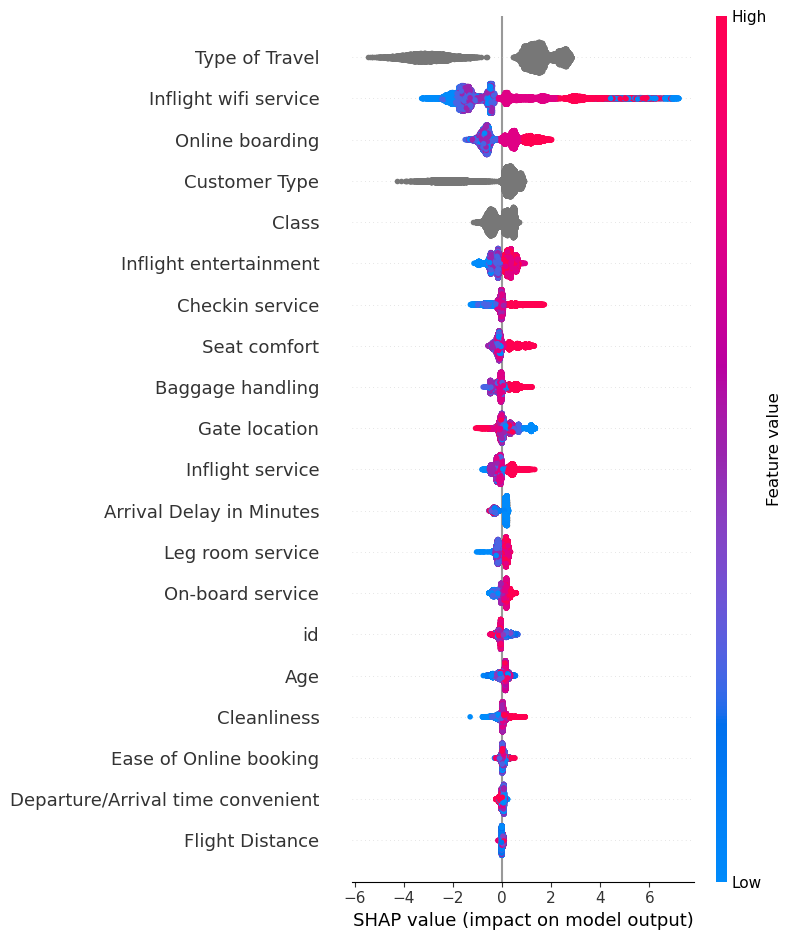

In [49]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)